<a href="https://colab.research.google.com/github/mzffreyvazov/ai-experiments/blob/main/dtsu/house_prediction_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
from scipy.stats import pearsonr # for correlation, statistics calculation

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

from faker import Faker
from string  import ascii_uppercase

In [ ]:
df_house = pd.read_excel(r"C:\Users\muzaf\data-science\lecture11\HousePricePrediction.xlsx")
df_house.head(5)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [ ]:
'''
Returns a list of all available datasets in seaborn library.

This function displays all the built-in example datasets that come with the
seaborn library, which can be loaded using sns.load_dataset().
'''
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

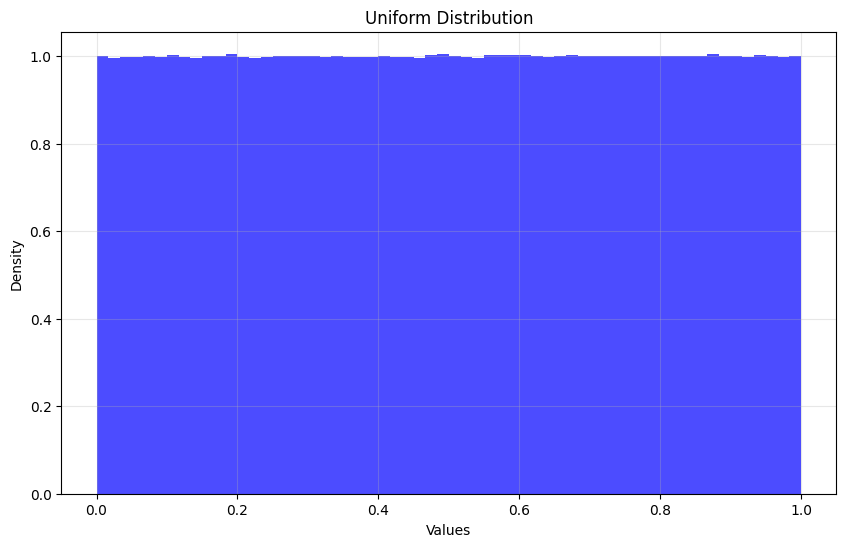

In [ ]:
# Generate uniform distribution data
# The uniform distribution is a continuous probability distribution and is concerned with events that are equally likely to occur.
# The histogram of a uniform distribution is roughly flat. As the number of data points increases, the histogram becomes more flat.
uniform_data = np.random.uniform(0, 1, 10000000)

# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(uniform_data, bins=60, density=True, alpha=0.7, color='blue')
plt.title('Uniform Distribution')
plt.xlabel('Values')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)

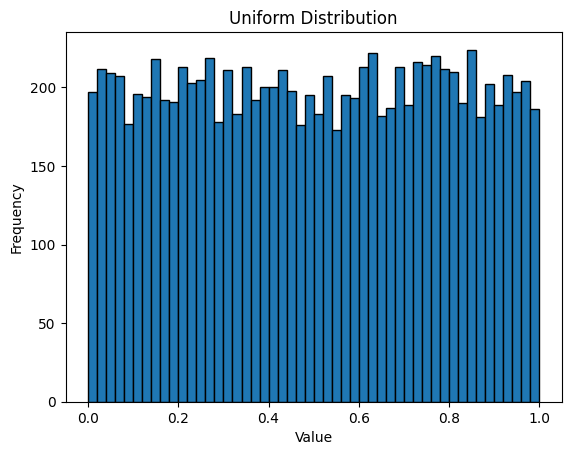

In [ ]:
data = np.random.uniform(low=0, high=1, size=10000)

# Plot a histogram
plt.hist(data, bins=50, edgecolor='black')
plt.title("Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

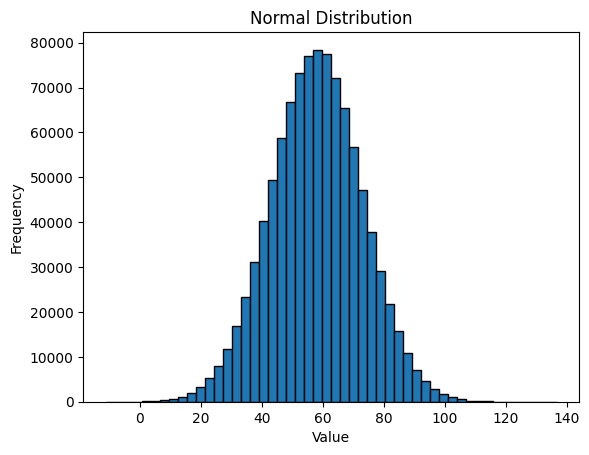

In [ ]:
# 1 million random numbers from normal distribution with mean=58 and std=15
data_normal = np.random.normal(loc=58, scale=15, size=1000000)

plt.hist(data_normal, bins=50, edgecolor='black')
plt.title("Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [ ]:
scale = 100
sample_size = 50

X_data = np.random.random(sample_size) * scale
Y_data = np.random.random(sample_size) * scale

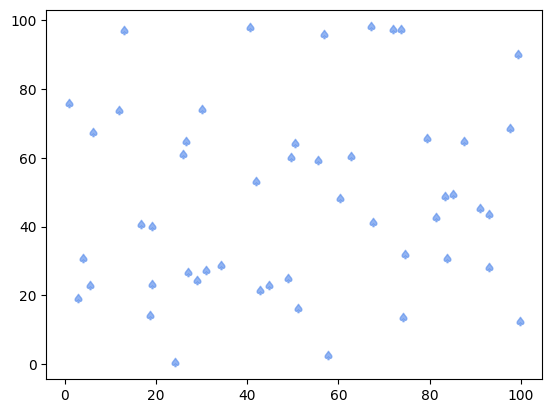

In [ ]:
plt.scatter(x=X_data, y=Y_data, c='cornflowerblue', alpha=0.7, marker="$♠️$")
plt.show()

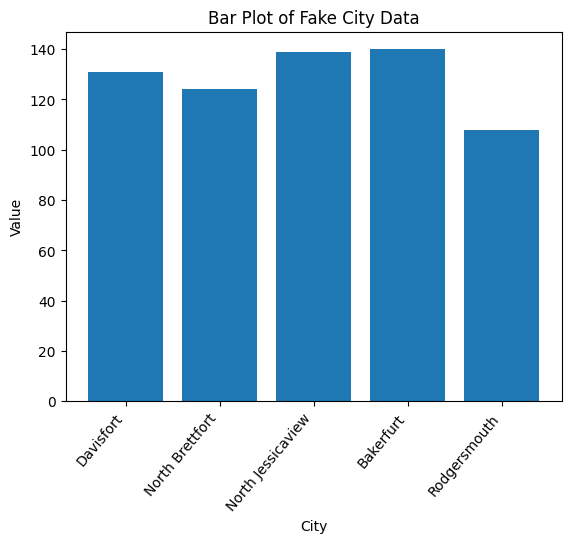

In [ ]:
fake = Faker()
sample_size = 5

x = [fake.city() for x in range(sample_size)]
y = [100 + x for x in np.random.randint(low=0, high=50, size=sample_size)]


plt.bar(x=x, height=y)
plt.xlabel("City")
plt.ylabel("Value")
plt.title("Bar Plot of Fake City Data")
plt.xticks(rotation=50, ha='right')
plt.show()

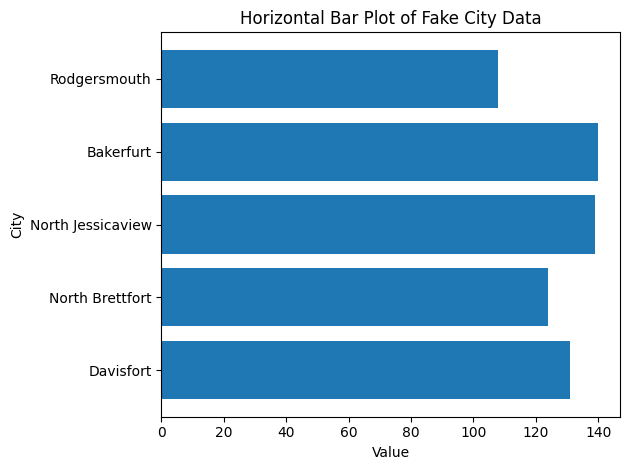

In [ ]:
plt.barh(y=x, width=y)  # Note: y and width are swapped
plt.ylabel("City")  # Now the label is on the y-axis
plt.xlabel("Value")
plt.title("Horizontal Bar Plot of Fake City Data")
plt.tight_layout()
plt.show()

In [ ]:
df_house.shape

(2919, 13)

In [ ]:
df_house.columns.__len__()

13

In [ ]:
df_house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [ ]:
df_house.head(5)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [ ]:
df_house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [ ]:
df_house.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [ ]:
df_house["MSZoning"].isnull().sum()

4

### filling the missing values in "MSZoning" with mode

In [ ]:
df_house["MSZoning"].fillna(df_house["MSZoning"].mode()[0], inplace=True)

In [ ]:
df_house["MSZoning"].isnull().sum()

0

### filling the missing values in "Exterior1st" with mode

In [ ]:
df_house["Exterior1st"].isnull().sum()

1

In [ ]:
df_house.fillna({'Exterior1st': df_house['Exterior1st'].mode()[0]}, inplace=True)


In [ ]:
df_house["Exterior1st"].isnull().sum()

0

### filling the missing values in "BsmtFinSF2" with zero, because no value probably means it is 0

In [ ]:
df_house.fillna({'BsmtFinSF2': 0}, inplace=True)


In [ ]:
df_house["BsmtFinSF2"].isnull().sum()

0

### filling the missing values in "TotalBsmtSF" with median

In [ ]:
df_house.fillna({'TotalBsmtSF': df_house["TotalBsmtSF"].median()}, inplace=True)


In [ ]:
df_house["TotalBsmtSF"].isnull().sum()

0

In [ ]:
df_house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        0
BsmtFinSF2         0
TotalBsmtSF        0
SalePrice       1459
dtype: int64

### now we can start visualizing

In [ ]:
mask = df_house['SalePrice'].notna()

# Identify groups of consecutive missing/non-missing values
df_house['group'] = (mask != mask.shift()).cumsum()

# Count the length of each group, keeping only non-missing ones
non_missing_streaks = df_house[mask].groupby('group').size()

# Find the longest streak
longest_streak = non_missing_streaks.max()

In [ ]:
longest_streak

1460

In [ ]:
df_house["SalePrice"].isnull().sum()

1459

In [ ]:
1460 + 1459

2919

In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2919 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2919 non-null   object 
 10  BsmtFinSF2    2919 non-null   float64
 11  TotalBsmtSF   2919 non-null   float64
 12  SalePrice     1460 non-null   float64
 13  group         2919 non-null   int32  
dtypes: float64(3), int32(1), int64(6), object(4)
memory usage: 308.0+ KB


In [ ]:
df_house.select_dtypes(include=['int64', 'float64', 'int32']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   LotArea       2919 non-null   int64  
 3   OverallCond   2919 non-null   int64  
 4   YearBuilt     2919 non-null   int64  
 5   YearRemodAdd  2919 non-null   int64  
 6   BsmtFinSF2    2919 non-null   float64
 7   TotalBsmtSF   2919 non-null   float64
 8   SalePrice     1460 non-null   float64
 9   group         2919 non-null   int32  
dtypes: float64(3), int32(1), int64(6)
memory usage: 216.8 KB


In [ ]:
# the first 1460 rows of SalesPrice are not null, and we will use those rows for visualization

### the correlations of numerical columns with sales  price

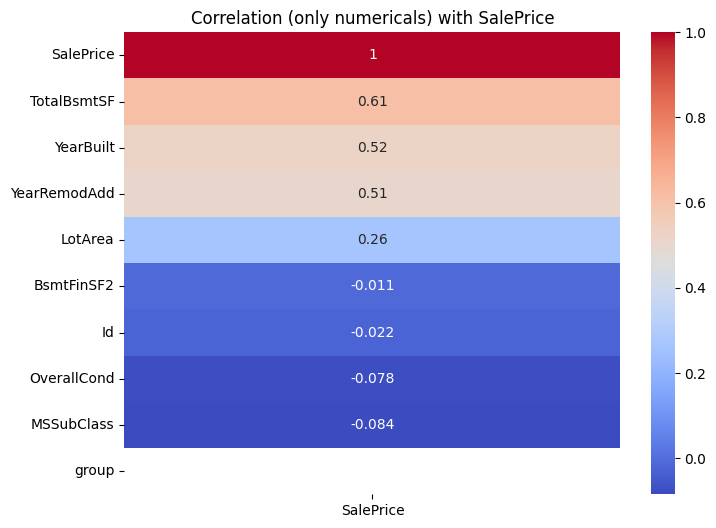

In [ ]:
df_numeric = df_house.select_dtypes(include=[np.number])

# Compute the correlation matrix among numerical columns
correlation = df_numeric.corr()['SalePrice'].sort_values(ascending=False)
# Plot a heatmap of the top correlated features
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation (only numericals) with SalePrice")
plt.show()

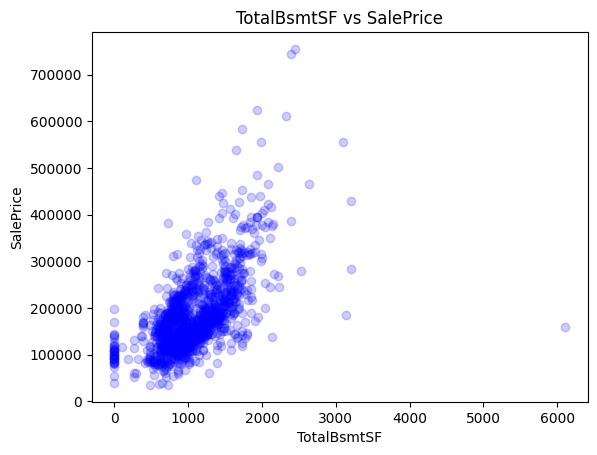

In [ ]:
plt.scatter(x=df_house["TotalBsmtSF"], y=df_house["SalePrice"], alpha=0.2, c='blue')
plt.title("TotalBsmtSF vs SalePrice")
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.show()

In [ ]:
df_house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice', 'group'],
      dtype='object')

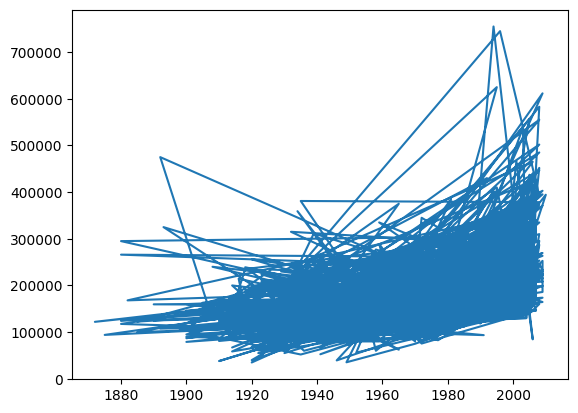

In [ ]:
plt.plot(df_house["YearBuilt"], df_house["SalePrice"])

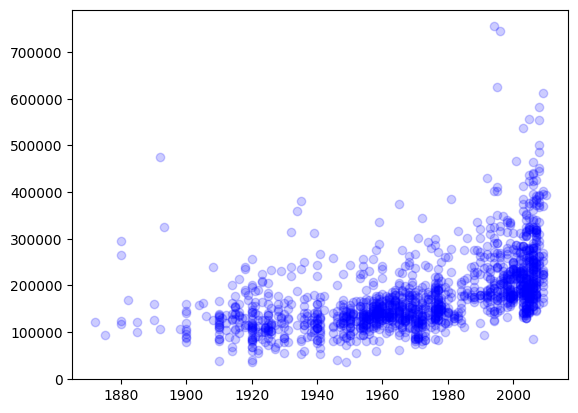

In [ ]:
plt.scatter(df_house["YearBuilt"], df_house["SalePrice"], alpha=0.2, c='blue')

(array([  5.,  11.,  13.,  61.,  58., 126., 165., 180., 122., 130., 121.,
         78.,  61.,  64.,  49.,  36.,  36.,  25.,  13.,  25.,  16.,  11.,
          4.,  11.,   9.,   5.,   4.,   4.,   4.,   2.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <BarContainer object of 50 artists>)

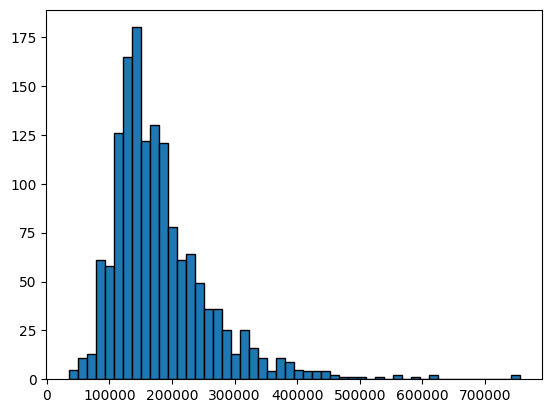

In [ ]:
plt.hist(df_house["SalePrice"], bins=50, edgecolor='black')

In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2919 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2919 non-null   object 
 10  BsmtFinSF2    2919 non-null   float64
 11  TotalBsmtSF   2919 non-null   float64
 12  SalePrice     1460 non-null   float64
 13  group         2919 non-null   int32  
dtypes: float64(3), int32(1), int64(6), object(4)
memory usage: 308.0+ KB


<Axes: xlabel='OverallCond', ylabel='SalePrice'>

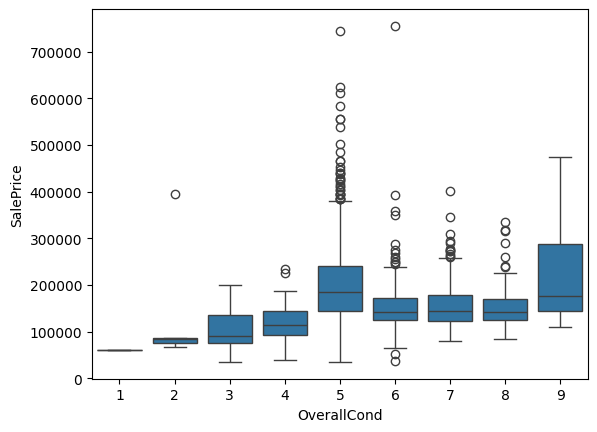

In [ ]:
sns.boxplot(x=df_house['OverallCond'], y=df_house["SalePrice"], data=df_house)

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

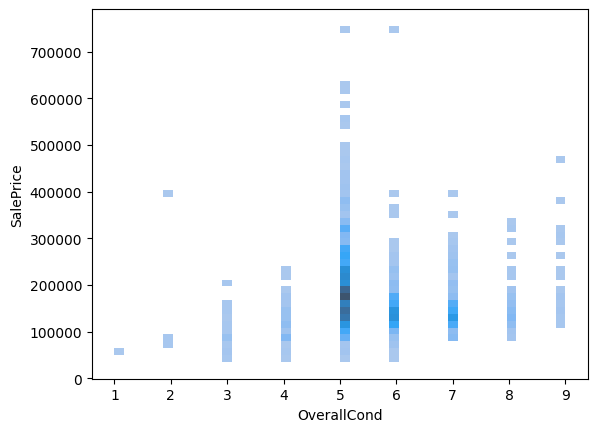

In [ ]:
sns.histplot(x=df_house["OverallCond"], y=df_house["SalePrice"])